In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
# Read the audio file
sampling_freq, signal = wavfile.read('spoken_word.wav')

In [3]:
# Normalize the values
signal = signal / np.power(2, 15) 

In [4]:
# Extract the length of the audio signal
len_signal = len(signal)

In [5]:
# Extract the half length
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)

In [6]:
# Apply Fourier transform
freq_signal = np.fft.fft(signal)

In [7]:
# Normalization
freq_signal = abs(freq_signal[0:len_half]) / len_signal

In [8]:
# Take the square
freq_signal **= 2

In [9]:
# Extract the length of the frequency transformed signal
len_fts = len(freq_signal)

In [10]:
# Adjust the signal for even and odd cases
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

In [11]:
# Extract the power value in dB
signal_power = 10 * np.log10(freq_signal)

In [12]:
# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

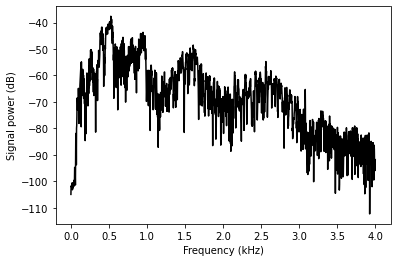

In [13]:
# Plot the figure
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()